# Medidas de desempenho em Aprendizagem Supervisionada

Este notebook procura explicar como podemos medir o desempenho de um sistema de Aprendizagem Supervisionado. O desempenho é medido com relação as predições que ele é capaz de fazer, após o modelo ser construido. 

Apenas relembrando: no aprendizado supervisionado, a máquina é treinada a partir de um conjunto de exemplos (amostras) e seus respectivos rótulos. A tarefa é construir um estimador que é capaz de predizer o rótulo de uma amostra, dado o seu conjunto de atributos.


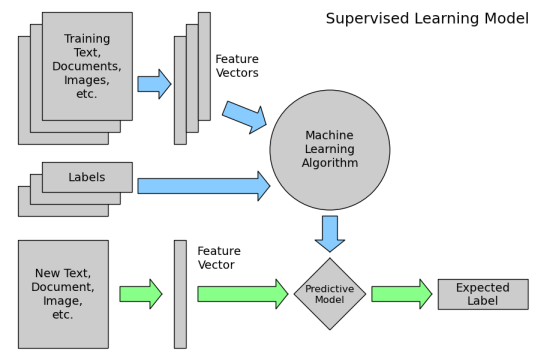

In [14]:
from IPython.display import Image
Image(filename='../figures/supervised_learning.png', width=500)

## Retomando o exemplo do dataset Iris

Vamos supor que eu decida usar um classificador kNN (*k-Nearest Neighbor*) para predizer a espécie de uma amostra, dados seus 4 atributos: comprimento da sépala, largura da sépala, comprimento da pétala, e largura da pétala. Como usar o sklearn para construir este modelo?

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb     # use seaborn for plot defaults
from sklearn import neighbors, datasets, metrics
import pandas as pd
from IPython.display import display

# 1. Construindo um modelo de classificação com o sklearn

## 1.1 Carregando os dados

In [16]:
from sklearn.datasets import load_iris

iris = load_iris() # carrega os dados
X = iris.data # armazena os atributos em "X"
Y = iris.target # armazena os rótulos em "Y"

## 1.2 Importando e instanciando o modelo escolhido (kNN com k=1)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=1)

## 1.3 Treinando o modelo com os dados

In [18]:
knn1.fit(X, Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## 1.4 Predizendo o rótulo para uma nova amostra

In [19]:
Y_pred = knn1.predict([[3, 5, 4, 2]])
print Y_pred
print iris.target_names[Y_pred]

[2]
['virginica']


Veja que se tivéssemos escolhido outro estimador, por exemplo, o classificador kNN com k=5 ou k=9, o resultado da predição da mesma amostra seria outro

In [20]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X, Y)
Y_pred5 = knn5.predict([[3, 5, 4, 2]])
print Y_pred5
print iris.target_names[Y_pred5]

[1]
['versicolor']


In [21]:
knn9 = KNeighborsClassifier(n_neighbors=9)
knn9.fit(X, Y)
Y_pred9 = knn9.predict([[3, 5, 4, 2]])
print Y_pred9
print iris.target_names[Y_pred9]

[1]
['versicolor']


## 2. Avaliando o desempenho de modelos

Como podemos então avaliar modelos (estimadores) para identificar, por exemplo, qual é o melhor classificador dentre os construidos anteriormente (kNN com N=1, N=5 e com N=9)?

### 2.1 Treinando e avaliando o modelo no mesmo conjunto de dados

O modelo é treinado no conjunto completo de dados. Em seguida, o modelo é avaliado no mesmo conjunto de dados, comparando as respostas preditas com os rótulos previamente conhecidos.

In [22]:
y_pred1 = knn1.predict(X)
print y_pred1
print(np.all(Y == y_pred1)) # True, caso as predições (y_pred) do classificador coincidirem com os rótulos (Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
True


In [23]:
y_pred5 = knn5.predict(X)
y_pred9 = knn9.predict(X)
print(np.all(Y == y_pred5)) # True, caso as predições (y_pred) do classificador coincidirem com os rótulos (Y)
print(np.all(Y == y_pred9)) # idem

False
False


Para o primeiro classificador (kNN com k=1), quando comparamos as predições para todos os dados com os rótulos verdadeiros, vemos que eles coincidem. Ao repetirmos a comparação das predições feitas agora pelo segundo e terceiro classificadores (k=5 e k=9) para todos os dados com os rótulos verdadeiros, vemos que eles não coincidem.

### Comparando a acurácia de classificadores

Mas como saber qual destes classificadores é o melhor? Existem diversas métricas de desempenho de classificadores, sendo que a mais utilizada é a acurácia. A acurácia mede a proporção de predições corretas no total de predições.

In [24]:
print "Acuracia kNN (k=1): ", (metrics.accuracy_score(Y, y_pred1))
print "Acuracia kNN (k=5): ", (metrics.accuracy_score(Y, y_pred5))
print "Acuracia kNN (k=9): ", (metrics.accuracy_score(Y, y_pred9))

Acuracia kNN (k=1):  1.0
Acuracia kNN (k=5):  0.966666666667
Acuracia kNN (k=9):  0.98


### Visualizando a matriz de confusão

Só a acurácia não é suficiente para avaliar o desempen ho de um classificador. Muitas vezes, é necessário saber não só quanto o classificador erra, mas onde ele erra. Por exemplo, em um problema de classificação de tumores em imagens de mamografia, um classificador pode ter a mesma acurácia do que outro, mas pode ser escolhido por errar mais na classe *não-tumor* (FALSO POSITIVO) do que na classe *tumor* (FALSO NEGATIVO).

In [25]:
from sklearn.metrics import confusion_matrix

df1 = pd.DataFrame(confusion_matrix(Y, y_pred1))
display(df1)

df5 = pd.DataFrame(confusion_matrix(Y, y_pred5))
display(df5)

df9 = pd.DataFrame(confusion_matrix(Y, y_pred9))
display(df9)

,0,1,2
0,50,0,0
1,0,50,0
2,0,0,50


,0,1,2
0,50,0,0
1,0,47,3
2,0,2,48


,0,1,2
0,50,0,0
1,0,48,2
2,0,1,49


Pelas Matrizes de Confusão resultantes para cada classificador, podemos ver que o classificador kNN com N=1 classificou corretamente todas as amostras. Isso significa que nosso modelo é perfeito! Os outros 2 classifcadores também não se sairam mal: de 150 amostras eles erraram a predição de 5 mostras (k=5) e 3 amostras (k=9).  

Qual o problema então? O problema é que normalmente este tipo de modelo não é capaz de generalizar quando novos dados são apresentados. E isso ocorre porque estamos avaliando o desempenho dos classificadores com os mesmos dados que foram usados para treiná-los. Isso é o mesmo que "trapacear", pois seu classificador já viu aquele dados antes e conhece seu rótulo. Isso faz com que o modelo tenha um ótimo desempenho durante o treinamento e teste com os mesmos dados, mas, quando ele precisar predizer a classe de um dado desconhecido, ele provavelmente vai errar.

O que aprendemos com isto então: **Nunca devemos avaliar um modelo com os mesmos dados que foram usados para o treinamento. A avaliação deve ser feita com dados que o classificador nunca viu!**


### 2.1 Dividindo o conjunto de dados em treinamento e teste

O que vamos fazer agora é dividir o conjunto de dados em 2 subconjuntos: *conjunto de treinamento* e *conjunto de teste*

- Treinaremos modelo no *conjunto de treinamento*
- Testaremos o modelo no *conjunto de teste*, composto por dados **não usados no treinamento**, para avaliar quão bom é o modelo 



Acuracia do classificador:  0.8
Matriz de confusão: 
[[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]


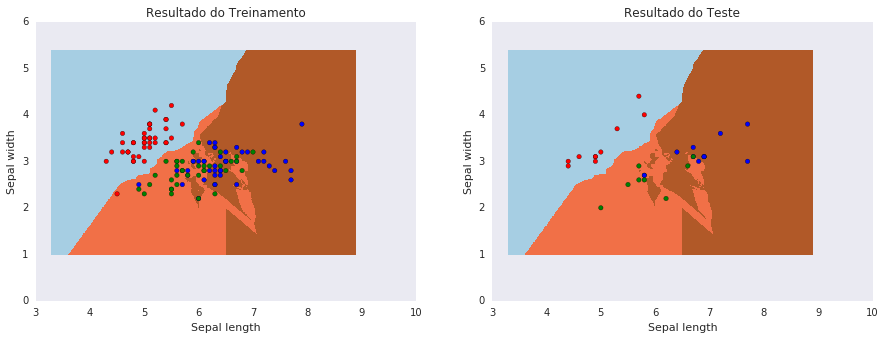

In [26]:
from sklearn.cross_validation import train_test_split, StratifiedShuffleSplit

h = .01  # step size in the mesh

X = iris.data[:,:2]  
Y = iris.target

# Divide os dados em conjunto de treino e teste, sendo que o conjunto de teste é 20% do conjunto total
# stratify = y garante que as amostras de teste sejam escolhidas de forma balanceada, ou seja, todas as
# classes estejam igualmente representadas no conjunto de testes
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, stratify=Y) 

# criando o modelo kNN, com k=5
knn = neighbors.KNeighborsClassifier(n_neighbors=5) 
knn.fit(Xtrain, Ytrain)
ypred = knn.predict(Xtest)

# Avaliando o desempenho do modelo no conjunto de teste
print "Acuracia do classificador: ", (metrics.accuracy_score(Ytest, ypred))
print "Matriz de confusão: \n" , (confusion_matrix(Ytest, ypred))

# Plotando a fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

# Plotando os cojuntos de treinamento e de teste
colors = np.array(['r','g','b'])

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(15,5))

# Treinamento
ax1.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax1.scatter(Xtrain[:, 0], Xtrain[:, 1], c=colors[Ytrain])

ax1.set_xlabel('Sepal length')
ax1.set_ylabel('Sepal width')
ax1.set_title('Resultado do Treinamento')

# Teste
ax2.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
ax2.scatter(Xtest[:, 0], Xtest[:, 1], c=colors[Ytest])

ax2.set_xlabel('Sepal length')
ax2.set_ylabel('Sepal width')
ax2.set_title('Resultado do Teste')

plt.show()


Este é um cenário mais real, onde no conjunto de teste, uma amostra é rotulada errada. Porisso é muito importante dividirmos nosso conjunto de dados em treinamento e teste, para que o modelo seja avaliado a partir de dados que nunca foram vistos no treinamento.


## Sugestão de atividades:

- Mude o valor de k do classificador kNN e verifique o que acontece com a fronteira de decisão e com a acurácia
- Altere a porcentagem de dados no conjunto de teste e verifique o que acontece